In [11]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv("C:/Users/avish/Downloads/bird_songs/birdsong_metadata.csv")

# Assuming the audio files are stored in a specific directory
audio_dir = "C:/Users/avish/Downloads/bird_songs/songs"  # Adjust as necessary

# Create a list of spectrograms and labels
spectrograms = []
labels = []

for index, row in data.iterrows():
    file_name = f"{'xc'+ str(row['file_id'])}.flac"  # Modify this if your filenames differ
    file_path = os.path.join(audio_dir, file_name)
    
    if os.path.exists(file_path):
        try:
            # Preprocess the audio file
            spectrogram = preprocess_audio(file_path, target_shape=(128, 128))
            spectrograms.append(spectrogram)
            labels.append(row['species'])  # Adjust based on your target variable
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
    else:
        print(f"File not found: {file_path}")

# Check if spectrograms and labels are populated
if len(spectrograms) == 0:
    raise ValueError("No audio files were processed. Please check your file paths and dataset.")

# Convert to NumPy arrays
spectrograms = np.array(spectrograms)
labels = np.array(labels)

# Encode the labels if necessary (e.g., using LabelEncoder)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels_encoded, test_size=0.3, random_state=42)

# Now proceed with training and evaluation as before
print(X_train)


[[[[0.2570967 ]
   [0.24414639]
   [0.22975752]
   ...
   [0.20180832]
   [0.24740542]
   [0.19116938]]

  [[0.2927717 ]
   [0.2897001 ]
   [0.31643555]
   ...
   [0.2832698 ]
   [0.22784205]
   [0.24826954]]

  [[0.3541896 ]
   [0.28690067]
   [0.35923114]
   ...
   [0.29136577]
   [0.18933205]
   [0.1913504 ]]

  ...

  [[0.03642861]
   [0.01755258]
   [0.26899508]
   ...
   [0.0974987 ]
   [0.06402649]
   [0.00568924]]

  [[0.        ]
   [0.        ]
   [0.23612237]
   ...
   [0.08919851]
   [0.03530525]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.07782338]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.23915884]
   [0.21680026]
   [0.1

Mel Spectrogram Shape: (128, 867)


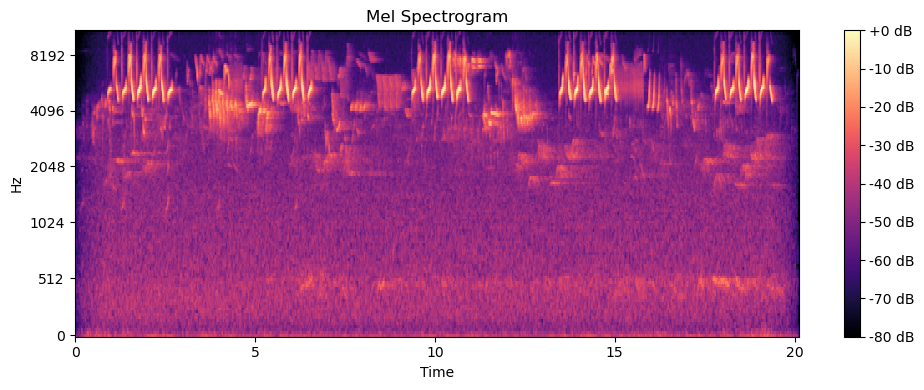

Processed Spectrogram Shape: (128, 128, 1)
Final Processed Spectrogram Shape: (1, 128, 128, 1)


c:\Users\avish\anaconda3\envs\PY_ESSENTIALS\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted Class: [1]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,970 (12.64 MB)

 Trainable params: 3,312,970 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Function to preprocess the spectrograms
def preprocess_audio(file_path, target_shape=(128, 128)):
    y, sr = librosa.load(file_path)
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    # Add a channel dimension (for grayscale: 1 channel)
    log_spectrogram = np.expand_dims(log_spectrogram, axis=-1)  # Shape (height, width, 1)

    # Resize the spectrogram to the target shape (e.g., 128x128)
    log_spectrogram_resized = tf.image.resize(log_spectrogram, target_shape)

    # Normalize to [0, 1]
    log_spectrogram_resized = (log_spectrogram_resized - np.min(log_spectrogram_resized)) / (np.max(log_spectrogram_resized) - np.min(log_spectrogram_resized))

    return log_spectrogram_resized

# Build the CNN model
def build_cnn_model(input_shape=(128, 128, 1)):
    model = Sequential()
    
    # 1st Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    
    # 2nd Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # 3rd Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # Change the number of classes as needed
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load the audio file
audio_file_path = 'C:/Users/avish/Downloads/xc98842.flac'  # Replace with your file path

# Check if the audio file exists
if not os.path.exists(audio_file_path):
    raise FileNotFoundError(f"Audio file not found: {audio_file_path}")

# Load the audio file
y, sr = librosa.load(audio_file_path)

# Generate Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Check the shape of the spectrogram
print("Mel Spectrogram Shape:", log_mel_spectrogram.shape)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

# Preprocess the audio
processed_spectrogram = preprocess_audio(audio_file_path, target_shape=(128, 128))

# Check the shape of the processed spectrogram
print("Processed Spectrogram Shape:", processed_spectrogram.shape)  # Should be (128, 128, 1)

# Add the batch dimension (for a single image, batch size = 1)
processed_spectrogram = np.expand_dims(processed_spectrogram, axis=0)  # Shape (1, 128, 128, 1)

# Check the final shape
print("Final Processed Spectrogram Shape:", processed_spectrogram.shape)  # Should be (1, 128, 128, 1)

# Build the CNN model
cnn_model = build_cnn_model()

# Now pass this to the model for prediction
prediction = cnn_model.predict(processed_spectrogram)

# Print the predicted class
predicted_class = np.argmax(prediction, axis=-1)
print("Predicted Class:", predicted_class)

# Summarize the model
cnn_model.summary()